<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part6/P6_Ch01_CH03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss function 구현
## IoU / Dice coefficient

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.losses as losses
from glob import glob

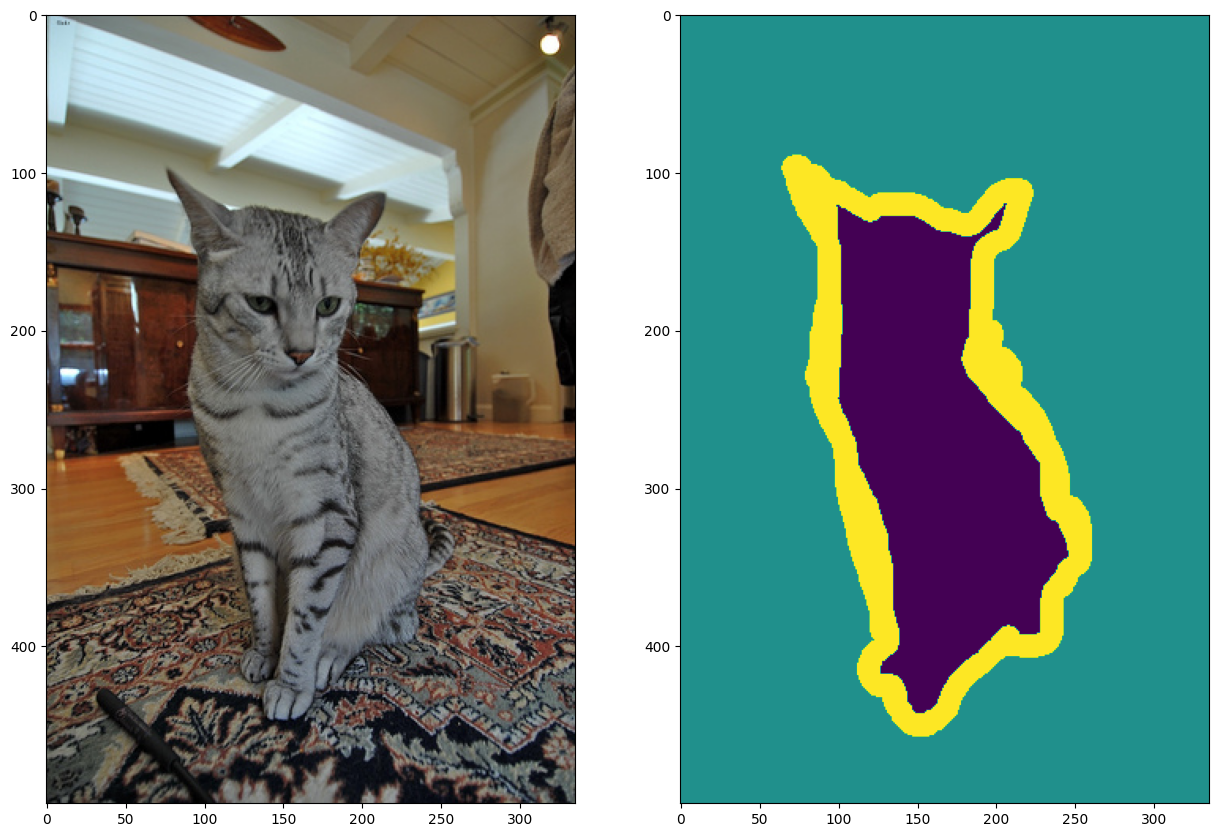

In [3]:
image_files = glob('/content/drive/MyDrive/data/images/*jpg')
image_path = image_files[134]
seg_path = image_path.replace('images', 'annotations/trimaps')
seg_path = seg_path.replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)

plt.show()

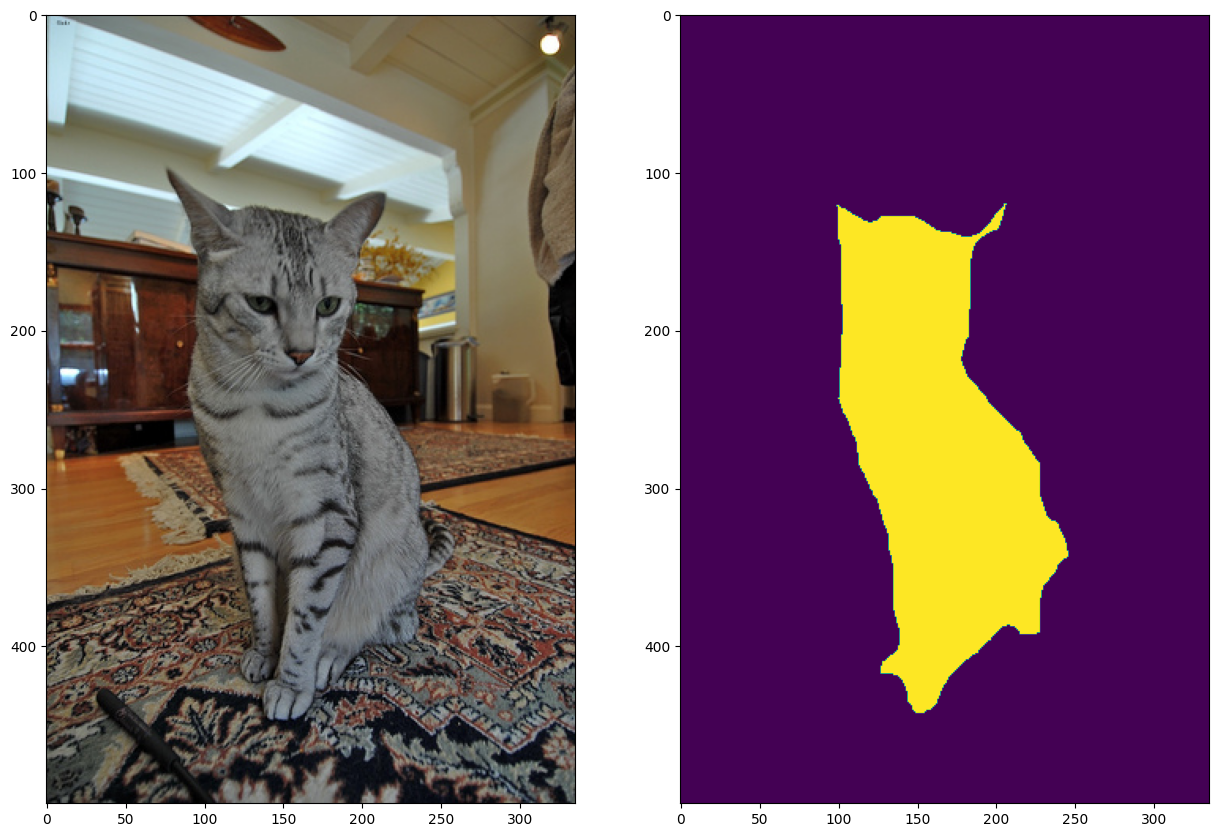

In [4]:
seg_map[seg_map != 1] =0

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)

plt.show()

In [12]:
'''
y_true =          0   1  1   0
y_pred =          0.5 1 0.2 0.3
y_true * y_pred = 0   1 0.2  0 -> reduce_sum = 1.2 -> 1.2 pixel 겹침
'''

def iou(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection

    score = intersection / (union + smooth)
    return score

def dice_coef(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true * y_pred)
    score = (2. * intersection )/ ( tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coef(y_true, y_pred)

    return loss

def bce_dice_loss(y_true, y_pred):
    loss = 1. * losses.binary_crossentropy(y_true, y_pred) + 1. * dice_loss(y_true, y_pred)

    return loss


In [17]:
print(dice_coef(seg_map.astype('float32'), seg_map.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), seg_map.astype('float32')).numpy())

0.99998116
0.9999624


In [18]:
zeros = np.zeros_like(seg_map)
print(dice_coef(seg_map.astype('float32'), zeros.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), zeros.astype('float32')).numpy())

0.0
0.0


In [19]:
ones = np.ones_like(seg_map)
print(dice_coef(seg_map.astype('float32'), ones.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), ones.astype('float32')).numpy())

0.27387068
0.15866174
